In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
titanic = pd.read_csv("titanic-passengers.csv",sep =";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
titanic.describe() ###getting more info on our raw data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.isnull().sum()  ###getting a summary about missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) ###filling missing values
titanic['Cabin'].fillna('G6',inplace=True)
titanic['Embarked'].fillna('S',inplace=True)

In [6]:
titanic.isnull().sum() ###verifying that data is ready

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

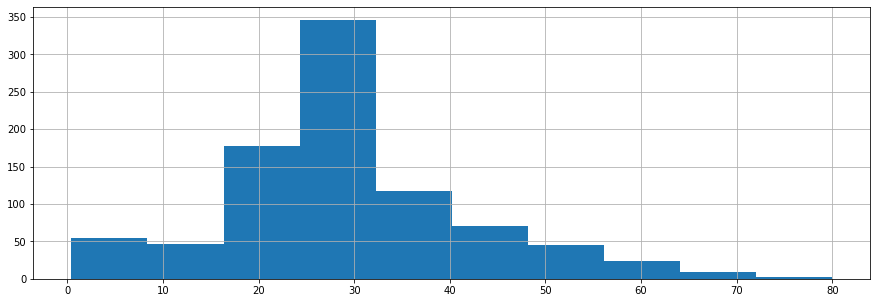

In [7]:
plt.figure(figsize = (15,5)) ###Age histogram
titanic['Age'].hist()

<AxesSubplot:>

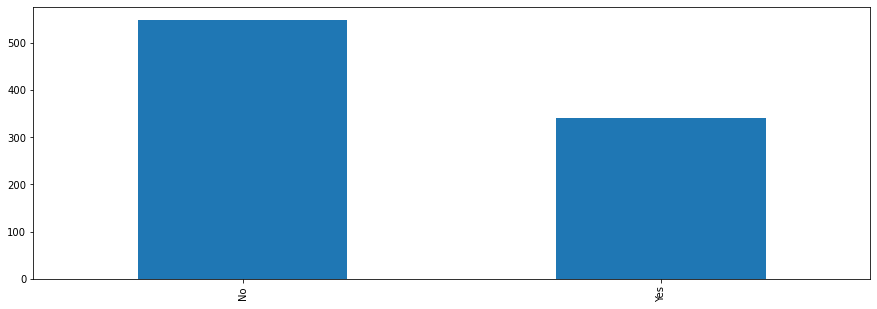

In [8]:
plt.figure(figsize = (15,5)) ###survivors plot
titanic['Survived'].value_counts().plot.bar()

In [9]:
titanic[['Survived', 'Sex', 'Age']].groupby(['Survived', 'Sex']).mean() ###surviving status / sex / age

Age
Survived Sex              
No       female  26.023272
         male    31.175224
Yes      female  28.979263
         male    27.631705

In [10]:
encoder=LabelEncoder()  ###turning survived column to numirical 1 = survived 0 = didn't survive
titanic['Survived']=encoder.fit_transform(titanic['Survived'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<AxesSubplot:xlabel='Survived', ylabel='Age'>

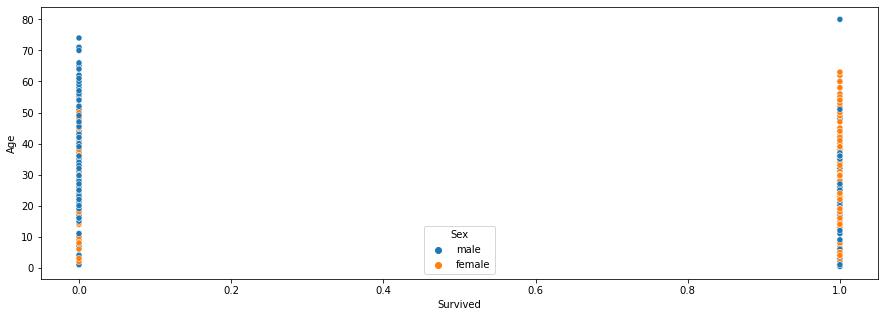

In [11]:
plt.figure(figsize = (15,5)) ###scatter plot of the age of people who (survived/didn't) with their sex specified
sns.scatterplot(data = titanic, x = 'Survived', y = 'Age', hue = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

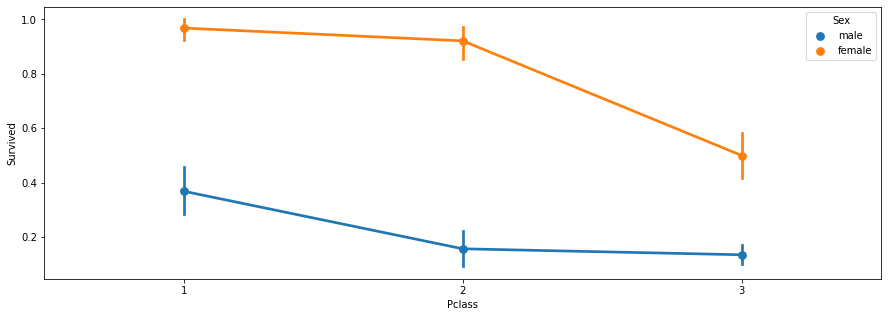

In [12]:
plt.figure(figsize = (15,5)) ###pointplot of the survivors and the class they were in (sex specified)
sns.pointplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [13]:
def plot_correlation_map( df ): ###the fonction

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

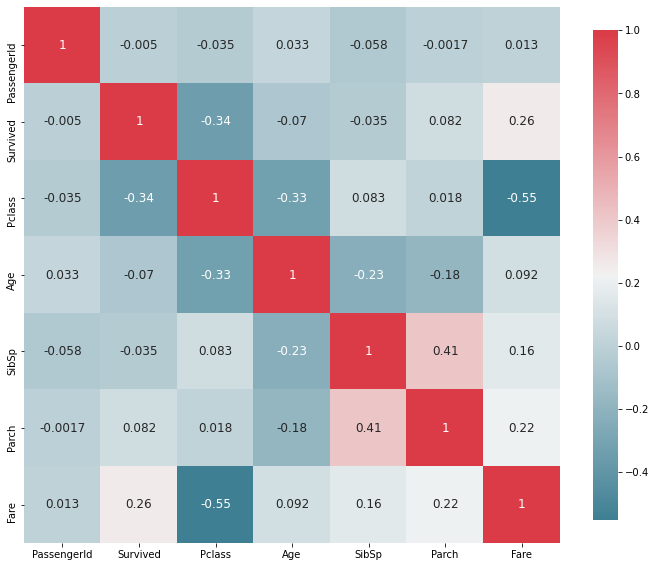

In [14]:
plot_correlation_map( titanic ) ### the correlation between p class and survived is high which means pclass is very important feature and it affects the outpot and also the correlation between age and survived status is high which means age is an important feature and it affects the output other features are not that important

In [15]:
titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean() ### the survivors per class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
df = titanic.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked','PassengerId'],axis = 1) ###removing useless columns
df.head()

,Survived,Pclass,Sex,Age
0,0,2,male,28.0
1,0,3,male,25.0
2,0,3,male,20.0
3,0,3,female,29.0
4,0,1,male,31.0


In [17]:
df.head() ### creating Title using the column name
df['Title']= titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
df['Title'].value_counts() ### the number per title

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Don               1
Mme               1
Sir               1
Capt              1
Jonkheer          1
Lady              1
the Countess      1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

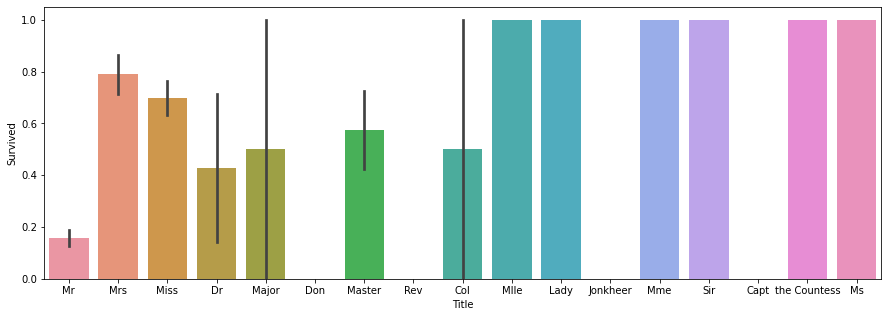

In [24]:
plt.figure(figsize = (15,5)) ### barplot of survivors per title
sns.barplot(data = df, x = 'Title', y = 'Survived')

<AxesSubplot:xlabel='Title', ylabel='Pclass'>

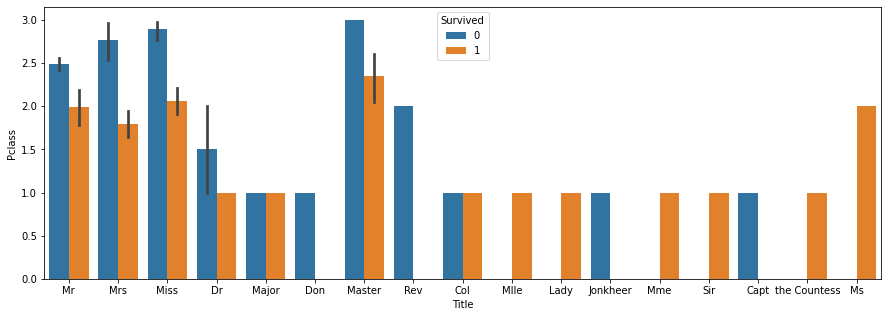

In [30]:
plt.figure(figsize = (15,5)) ### barplot of survivors title specified and the class they were in
sns.barplot(data = df, x = 'Title', y = 'Pclass', hue = 'Survived')

In [33]:
def replace_titles(x): ### transforming the Title to a more optimised one based on the society
    title = x['Title']
    if title in ['Capt', 'Col', 'Dr', 'Major', 'Rev']:
        return 'Officer'
    elif title in ['the Countess', 'Mme', 'Lady','Jonkheer' ,'Don' ,'Dona', 'Sir']:
        return 'Royalty'
    elif title in ['Mlle','Mme' ,'Miss' ]:
        return 'Miss'
    elif title in ['Ms' ,'Mr' ,'Mrs']:
        return 'Mrs'

    else:
        return title

In [36]:
df['Title'] = df.apply(replace_titles, axis=1) ###replacing with the new titles

In [37]:
print(df.Title.value_counts())

Mrs        643
Miss       184
Master      40
Officer     18
Royalty      6
Name: Title, dtype: int64


In [38]:
df.head()

,Survived,Pclass,Sex,Age,Title
0,0,2,male,28.0,Mrs
1,0,3,male,25.0,Mrs
2,0,3,male,20.0,Mrs
3,0,3,female,29.0,Mrs
4,0,1,male,31.0,Mrs


<AxesSubplot:xlabel='Title', ylabel='Survived'>

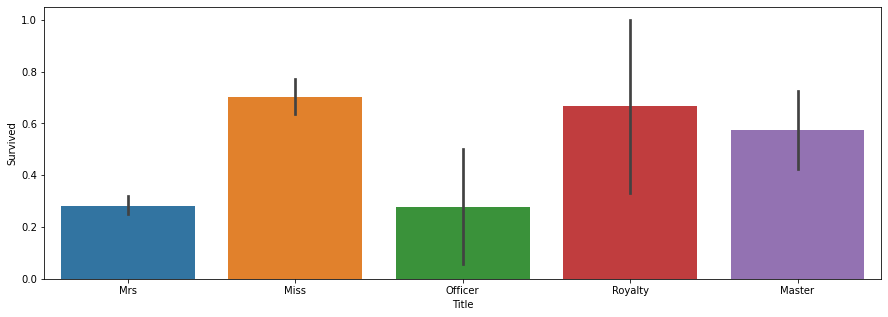

In [39]:
plt.figure(figsize = (15,5)) ###barplot showing the number of survivors per class
sns.barplot(data = df, x = 'Title', y = 'Survived')

<AxesSubplot:xlabel='Title', ylabel='Pclass'>

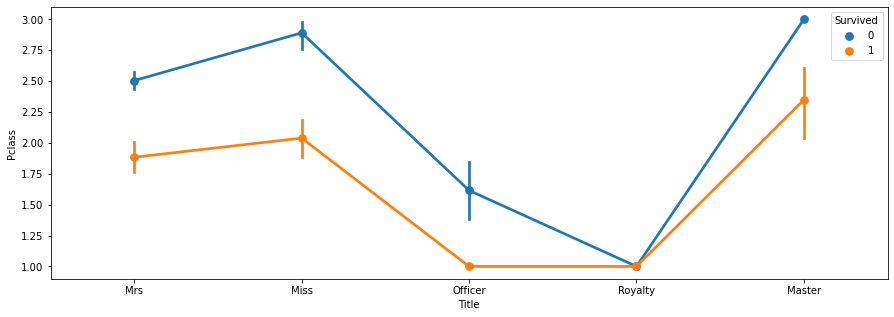

In [42]:
plt.figure(figsize = (15,5)) ### pointplot showing the number of titles per class and if they survived or not
sns.pointplot(data = df, x = 'Title', y = 'Pclass', hue = 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

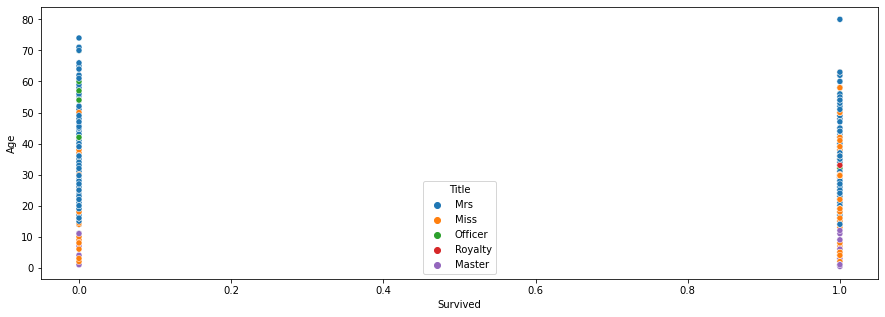

In [44]:
plt.figure(figsize = (15,5)) ###scatterplot showing the age of survivors and their class in society
sns.scatterplot(data = df, x = 'Survived', y = 'Age', hue = 'Title')

In [50]:
titanic['FamillySize'] = titanic['Parch']+titanic['SibSp'] ###claculating family size by the addition of sibsp(Number of Siblings/Spouses) and parch (Number of Parents/Children)
titanic = titanic.drop(['SibSp','Parch'],axis = 1)

KeyError: 'Parch'

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamillySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,248740,13.0000,G6,S,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,348123,7.6500,F G73,S,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,350050,7.8542,G6,S,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.0750,G6,S,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,F.C. 12750,52.0000,B71,S,1


In [52]:
def plot_correlation_map( df ): ###the fonction is used again to know the correlation between the new feature and surviving status

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

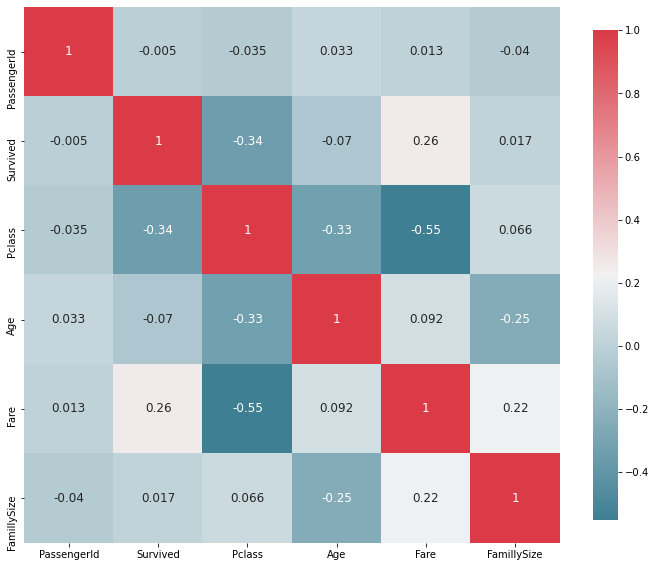

In [53]:
plot_correlation_map( titanic ) ### as we can see the correlation between survaving status and family size isn't high which means familly size isn't that important and doesn't affect the output